# Nonlinear Dynamics Homework #1

#####  Problem #1: Construct 10,000 random numbers and bin them in intervals of length 0.01. Plot the histogram of this.

Okay, so Python has a nice in that the histogram command bins for us. But first I'll make 10,000 random numbers, using the best random number generator in Python. It makes random numbers based on the system CPU that are suitable for cryptography (see https://docs.python.org/2/library/os.html#os.urandom for details). Note that the generator defaults to the range $[0,1)$. The best I can do to make it $(0,1)$ is to use my machince precision to get the edges right. Hopefully that's okay.

In [1]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
rands = np.zeros(10000)

foo = random.SystemRandom()

for i in range(10000):
    
    rands[i] = foo.uniform(0+sys.float_info.epsilon, 1.0 - sys.float_info.epsilon)
    
print rands

[ 0.6090817   0.02900779  0.62646369 ...,  0.26555126  0.26411794
  0.0120324 ]


Okay, this looks good. Now lets bin and histogram it using the command hist from pyplot. Note that I pass it the number of bins I want so that python will automatically make their width 0.01. Just to be sure, we'll print the bin sizes (which I call bins here) to check.

In [7]:
def histplot(data):    
    
    font = {'family' : 'monospace',
            'weight' : 'bold',
            'size'   : 18}

    matplotlib.rc('font', **font)

    num_bins = 10000*0.01   # Set the number of bins I want.

    # Bin the data and plot the histogram. Note this function returns the binned data (measurement), the bins themselves (bins)
    # and the patches that python used to construct the histogram, which we don't care about here.

    plt.figure(figsize=(10,8), dpi=80)
    plt.title('Histogram of binned numbers')
    plt.xlabel('Bin value')
    plt.ylabel('Number of numbers in bin')

    [measurements, bins, patches] = plt.hist(data, bins=num_bins, range=[0.0, 1.0])

    print "The number of bins is", num_bins

    print "The bins are:"

    print bins  # Check that the bin sizes are correct.

    plt.show()
    
    return measurements, bins

The number of bins is 100.0
The bins are:
[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]


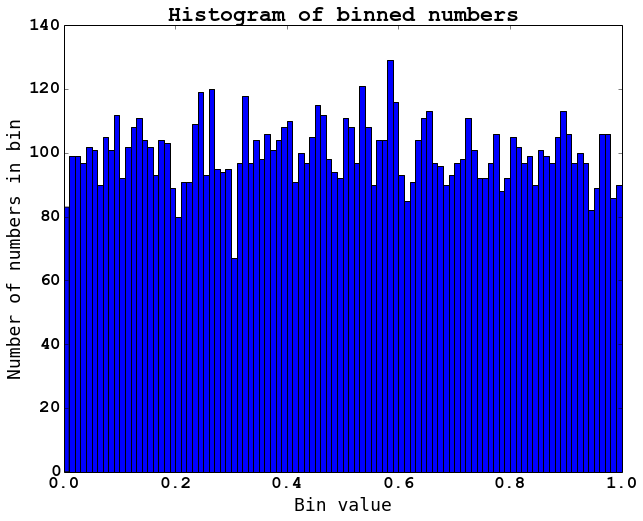

In [8]:
[measurements, bins] = histplot(rands)

Now for the Graduate Student part of this question. We would expect that the # in any bin would be 10,000/num_bins=100. To check this, we can calculate the $\chi^2$ of this and see if any deviation from this is small or not. To calculate $\chi^2$ we do:

\begin{align} \chi^2 = \sum_i d_i^2/e_i \\ d_i = o_i - e_i \end{align}

where $e_i$ is each expected measurement, $o_i$ is the actual measurement (here what the code returned) and $d_i$ is the deviation of the actual observed measures from the expected measures. So doing this in the code enviroment:

In [10]:
num_bins = 100
expected = 10000/num_bins

print "Your expected measurement is", expected

deviations = measurements - expected

chi_2 = 0.0

for i in range(len(deviations)):
    
    chi_2 = chi_2 + deviations[i]**2.0/expected
    
print "Your Chi^2 is", chi_2

above90 = (chi_2 - 117.407)/117.407
above90 = 0.90 + 0.90*above90

print "Your confidence level that the distribution is uniform is", above90


Your expected measurement is 100
Your Chi^2 is 93.28
Your confidence level that the distribution is uniform is 0.715051061691


The number of degrees of freedom here is the number of bins, 100, minus 1 for the $\chi^2$ test. Looking then at the table for a $\chi^2$ distribution at NIST (http://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm) I see for 99 degrees of freedom that this is a uniform distribution with an upper value of 117.407 for 90% confidence and 123.225 for 95% confidence. 95% is the "standard" assumption about the accuracy of the measurements, but if you want to be safer even the 90% confidence passes the $\chi^2$ test. The noise is indeed random.

##### Problem #2 Construct 10,000 iterations of the standard logistic map $x'= \lambda x(1-x)$ for $x \in [0,1]$ with $\ 3.7 \le lambda \le 4.0$ and bin them in intervals of 0.01. Plot the histogram of this.

Okay, no problem. I pick $\lambda=3.85$ to be right in the middle. First I'll define the function:

In [45]:
def logistic(x,lam):
    
    x1 = lam*x*(1-x)
    return x1

Then we will run it on the same random number generator.

In [49]:
x_prime = np.zeros(10000)
lamb = 3.85


for i in range(10000):
    
    x = foo.uniform(0.0, 1.0 + sys.float_info.epsilon)
    x_prime[i] = logistic(x, lamb)
    

And then plot the histogram of the data.

The number of bins is 100.0
The bins are:
[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]


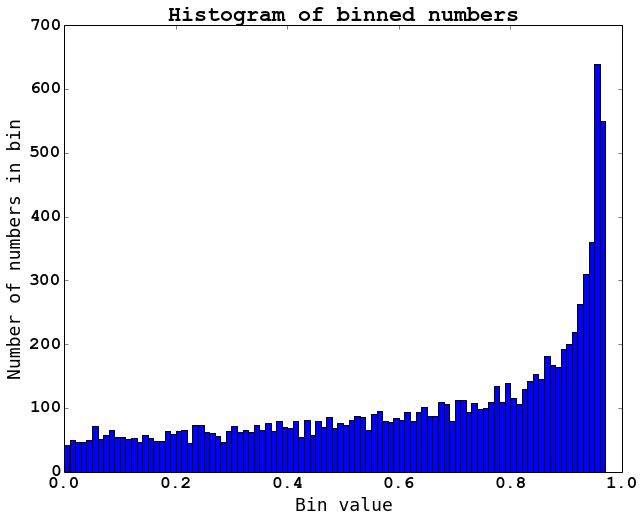

In [55]:
[measurements, bins] = histplot(x_prime)

Well that doesn't look very uniform. Lets look at the $\chi^2$ of it.

In [57]:
expected = 10000/num_bins

print "Your expected measurement is", expected

deviations = measurements - expected

chi_2 = 0.0

for i in range(len(deviations)):
    
    chi_2 = chi_2 + deviations[i]**2.0/expected
    
print "Your Chi^2 is", chi_2

Your expected measurement is 100.0
Your Chi^2 is 8054.92


Okay, the table value for a confidence level of 99.9% is only 148.230. So that means we have to reject that this is a uniform distribution... its way above that.

##### Problem #3: Construct the linear relation between the fold map of $y'$ and the logistic map $x'$ from above, and find $a(\lambda)$, given that:

\begin{align} \\ x'&=\lambda x(1-x) \\ y'&=a-y^2 \\ y&=mx+b \end{align}

Okay, lets write out $y'$ and try to form $x'$ from it with the linear relation between them:

\begin{align} \\ y'&=a-y^2 \\ mx'+b &= a - (mx +b)^2 \\ x' &= \frac{a}{m} - \frac{b}{m} - \frac{1}{m}(m^2x^2 + b^2 + 2mxb) \\
&= \frac{a}{m} - \frac{b}{m} - \frac{b^2}{m} - mx\left(x+\frac{2b}{m} \right) \end{align}

Comparing this to the logistic map, we see the following relations must be true.

\begin{align} a &= b + b^2 \\ m &= -2b \\ m &= \lambda \end{align}

And using these relations we find that $a(\lambda)$ must be:
\begin{align} a(\lambda) = \frac{\lambda}{2}\left(\frac{\lambda}{2} - 1 \right) \end{align}